# Bank Note Authentication

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

In [4]:
columns = ["var","skewness","curtosis","entropy","class"]
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

In [6]:
data.shape

(1372, 5)

In [7]:
data.dtypes

var         float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [9]:
df=data.iloc[:,:-1]
df.head()

,var,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [10]:
df.isna().sum()

var         0
skewness    0
curtosis    0
entropy     0
dtype: int64

In [12]:
cols=df.columns

In [13]:
import matplotlib.style as style
style.use('fivethirtyeight')

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


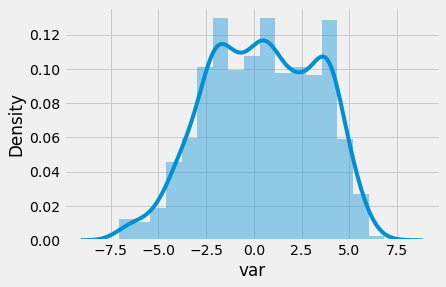

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


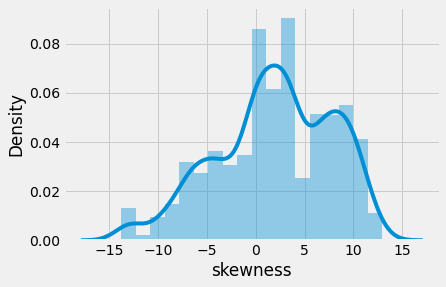

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


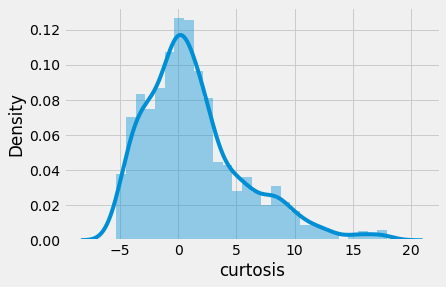

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


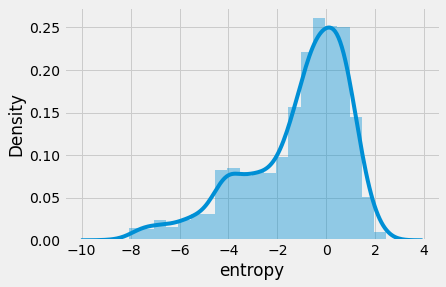

In [14]:
for i in cols:
    sns.distplot(df[i])
    plt.show()

In [17]:
X=df.apply(zscore)

In [22]:
pca=PCA( n_components=4)
pca.fit(X)
print('Eigen values: ',pca.explained_variance_)
print('Eigen Vectors: ',pca.components_)
print('percentage of variation  explainced: ',pca.explained_variance_ratio_)

Eigen values:  [2.18149408 1.29409812 0.35163873 0.17568664]
Eigen Vectors:  [[-0.24877213 -0.6393234   0.6127065   0.39238854]
 [-0.75459093  0.05034037  0.1534594  -0.6360099 ]
 [ 0.60346443 -0.11596089  0.5096688  -0.6021806 ]
 [-0.06734722  0.75847512  0.58419061  0.28089352]]
percentage of variation  explainced:  [0.54497602 0.32328872 0.08784561 0.04388965]


<BarContainer object of 4 artists>

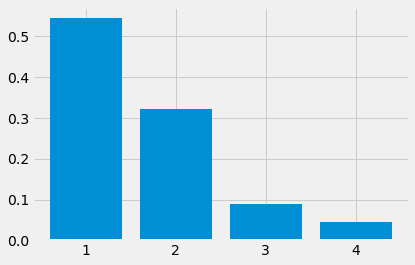

In [27]:
plt.bar(range(1,5),pca.explained_variance_ratio_)

In [31]:
cov=np.cov(X.T)
eigen_values,eigen_vector=np.linalg.eig(cov)

In [32]:
eigen_values

array([2.18149408, 1.29409812, 0.35163873, 0.17568664])

In [34]:
eigen_vector

array([[-0.24877213, -0.75459093,  0.60346443,  0.06734722],
       [-0.6393234 ,  0.05034037, -0.11596089, -0.75847512],
       [ 0.6127065 ,  0.1534594 ,  0.5096688 , -0.58419061],
       [ 0.39238854, -0.6360099 , -0.6021806 , -0.28089352]])

In [39]:
pca=PCA(n_components=3)
pca.fit(X)
x_vals=pca.transform(X)

In [41]:
from sklearn.svm import SVC

In [43]:
y=data[['class']]

In [46]:
from sklearn.model_selection import train_test_split,StratifiedKFold

In [47]:
kfold=StratifiedKFold()
for train,test in kfold.split(X,y):
    x_train,y_train=X.loc[train],y.loc[train]
    x_test,y_test=X.loc[test],y.loc[test]

In [49]:
svm=SVC()
svm.fit(x_train,y_train)
print(svm.score(x_train,y_train))
print(svm.score(x_test,y_test))

1.0
1.0


E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
kfold=StratifiedKFold()
for train,test in kfold.split(x_val,y):
    x_train,y_train=x_val.loc[train],y.loc[train]
    x_test,y_test=x_val.loc[test],y.loc[test]

In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
print(svm.score(x_train,y_train))
print(svm.score(x_test,y_test))